In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('../data/query_id_map.csv.gz', compression='gzip')

In [4]:
df["sum"] = df.apply(lambda x: x.notna().sum()-2, axis=1)

In [5]:
heatmap = df[df["sum"] > 1]

In [6]:
heatmap = heatmap[['t0', 't1', 't2', 't3', 't4', 't5']].notna().astype(int)

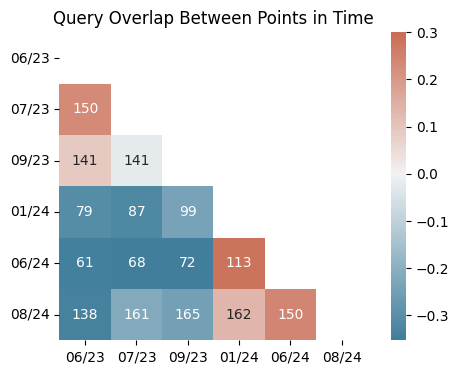

In [46]:
corr = heatmap.corr()
d = np.dot(heatmap.T, heatmap)

label_map = {"t0": "06/23", "t1": "07/23","t2": "09/23", "t3":"01/24", "t4": "06/24", "t5":"08/24"}
tick_labels = list(label_map.values())

mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(6, 4))

cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=d, square=True, xticklabels=tick_labels, yticklabels=tick_labels, fmt="g")
plt.yticks(rotation=0)
plt.title("Query Overlap Between Points in Time")

# to pdf
plt.savefig("../figures/query_overlap.pdf", bbox_inches='tight')